# The Fast & The Curious - Project Report <br>


Github Link - https://github.com/CS418/group-project-the-fast-the-curious

### Group Members: 
&emsp; Georgi Nikolov    (gnikol5@uic.edu)&emsp;(Github: https://github.com/NikolovG)<br>
&emsp; Daniel Valencia  (dvalen2@uic.edu)&emsp;(Github: https://github.com/Valencia24)<br>
&emsp; Lizbeth Gutierrez (igutie37@uic.edu)&emsp; (Github: https://github.com/lgutie37)<br>
&emsp; Jovad Uribe   (juribe5@uic.edu)&emsp; (Github: https://github.com/jovuribe)<br>


### Project Sections:
&emsp; Section 1: Project Introduction <br>
&emsp; Section 2: Data Cleaning <br>
&emsp; Section 3: Exploratory Data Analysis <br>
&emsp; Section 4: Visualizations (Total Visualizations = 2N)<br>
&emsp; Section 5: Machine Learning Analysis (Total ML = N+1)<br>
&emsp; Section 6: Results <br>
&emsp; Section 7: References <br>




NOTE: Visualizations are present outside of the designated section as well.

## Section 1: Project Introduction

This project report attempts to stay true to its purpose of trying to inch closer to the problem statements which are as follows,

1. We would like to be able to make predictions about weather conditions with regard to specific features within the data such as precipitation and air temperature.
2. In addition, we would like to investigate the potential tell signs within changes in the climate, as well as potentially finding which areas area geographically changing faster than others.
3. Finally, having access to more accurate weather predictions would allow for advanced warnings and help people escape potentially dangerous weather conditions.
<br>
We chose to investigate this topic because it is highly relevant to today’s world and severe weather will only get stronger as time goes on.

We intend to accomplish these goals via the following methodologies:<br>
> Visualizations that look at temperature changes over the course of an entire year here in Chicago.<br>
> Several Machine learning implementations that will predict precipitation & temperature.<br>
> A Scatterplot to investigate if sea level air pressure relates to the average wind speed of a given area.<br>
> An Histogram of weather condition codes to give insight into various meteorological tendencies.<br>
> In addition, we have much more to offer in relation to ML analysis and subsequent visualizations for better representation of our findings.<br>


Generally speaking we will be using **MeteoStat** for our data collection<br>
1. API that connects to different weather stations around the world
2. Able to access historical data via independent weather stations 
3. Free for use in development (no license required)
4. Independent Python library compatible with Pandas




## Section 3: Data Cleaning <br>

First, we requested our data using the Meteostat JSON API which retrieved 9 years of weather data from the weather station closest to Chicago. This dataset used imperial units for measurements and represented the time period of 01/01/2012 - 01/01/2021. This dataset was then loaded into a dataframe (df). The initial dataset is displayed below to show how it looked prior to being cleaned.

In [1]:
import pandas as pd
import requests

url = "https://meteostat.p.rapidapi.com/stations/daily"
querystring = {"station":"KPWK0","start":"2012-01-01","end":"2021-01-01","model":"true","units":"imperial"}
headers = {
	"X-RapidAPI-Key": "6fec950325msha54f5bc890b65e0p1fd8d0jsnc882976e1304",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers, params=querystring)
json = response.json()
type(json['data'])
type(json['data'][0])
df = pd.DataFrame(json['data'])
df

C:\Users\jovur\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jovur\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\jovur\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2012-01-01,36.7,30.9,45.0,NaN,None,268.0,17.2,None,NaN,None
1,2012-01-02,23.2,18.0,30.0,NaN,None,315.0,17.2,None,NaN,None
2,2012-01-03,21.2,12.9,28.0,0.000,None,NaN,9.3,None,1027.0,None
3,2012-01-04,33.3,26.1,41.0,0.000,None,NaN,7.9,None,1016.3,None
4,2012-01-05,38.5,25.0,50.0,0.000,None,NaN,6.7,None,1012.5,None
...,...,...,...,...,...,...,...,...,...,...,...
3284,2020-12-28,30.0,21.9,35.1,0.000,None,296.0,10.4,None,1024.9,None
3285,2020-12-29,25.7,18.0,32.0,NaN,None,145.0,6.3,None,NaN,None
3286,2020-12-30,32.0,27.0,36.0,0.291,None,246.0,13.3,None,1014.2,None
3287,2020-12-31,24.8,19.0,28.0,NaN,None,288.0,4.0,None,NaN,None


The columns from the dataframe that were dropped and were not kept were snow, wdir, wspd, tsun and wpgt. 
Snow is an integer value column that records the maximum snow depth in mm. Wdir is a column that tracks the average wind direction in degrees as an integer value. Wspd and Wpgt are columns that track the average wind speed in km/h, and the peak wind gust in km/h as float values. Tsun tracks the daily sunshine total in minutes as an integer type.

Since we were not concerned with information focused on wind and daily sunshine in this project, these rows were chosen to be dropped. As our primary focus was on air pressure and temperature in this project, these dropped columns were not as important as the other columns and by dropping them, we were able to create a smaller and more focused dataframe. Furthermore, any rows with NaN values were dropped because as in the case of prcp, 1435 rows were shown to not have a value in that specific square and in many of these cases, several rows also had a NaN value in both prcp and pres. 

By removing these rows, we were able to have a much cleaner dataset where we could consistently use more of the data. As a result of all these removed rows and columns, the size of the original dataframe decreased from 3289 rows × 11 columns to a dataframe with 1583 rows × 6 columns.

In [2]:
# we will be keeping date, tavg, tmin, tmax, prcp, and pres columns, here we drop the columns discussed in the markdown above:
df = df.drop("snow", axis='columns')
df = df.drop("wdir", axis='columns')
df = df.drop("wspd", axis='columns')
df = df.drop("wpgt", axis='columns')
df = df.drop("tsun", axis='columns')

# shows the rows with NaN in rows:
df[df['prcp'].isna()]
df[df['pres'].isna()]

# drop rows with NaN in rows:
df = df.dropna(subset=['prcp','pres'])

#print post dropped rows, after cleaning data
df

,date,tavg,tmin,tmax,prcp,pres
2,2012-01-03,21.2,12.9,28.0,0.000,1027.0
3,2012-01-04,33.3,26.1,41.0,0.000,1016.3
4,2012-01-05,38.5,25.0,50.0,0.000,1012.5
5,2012-01-06,47.5,42.1,55.9,0.000,1006.5
6,2012-01-07,37.8,27.0,45.0,0.000,1017.3
...,...,...,...,...,...,...
3276,2020-12-20,36.7,32.0,42.1,0.000,1011.9
3278,2020-12-22,38.1,33.1,41.0,0.000,1019.2
3281,2020-12-25,16.2,9.0,21.9,0.000,1014.5
3284,2020-12-28,30.0,21.9,35.1,0.000,1024.9


## Section 4: Exploratory Data Analysis <br>

All of our variables are numerical and continous except for the date which is a date object.

In [3]:
df.describe()

,tavg,tmin,tmax,prcp,pres
count,1582.000000,1582.000000,1582.000000,1583.000000,1583.000000
mean,52.647851,43.268774,61.639570,0.012623,1019.025963
std,19.821738,19.015317,21.008678,0.084280,6.591840
min,-15.500000,-20.900000,-9.000000,0.000000,999.900000
25%,37.200000,28.900000,44.100000,0.000000,1014.800000
50%,54.700000,44.100000,64.900000,0.000000,1018.600000
75%,70.000000,60.100000,80.100000,0.000000,1022.900000
max,91.800000,82.900000,102.000000,1.650000,1044.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 2 to 3286
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1583 non-null   object 
 1   tavg    1582 non-null   float64
 2   tmin    1582 non-null   float64
 3   tmax    1582 non-null   float64
 4   prcp    1583 non-null   float64
 5   pres    1583 non-null   float64
dtypes: float64(5), object(1)
memory usage: 86.6+ KB


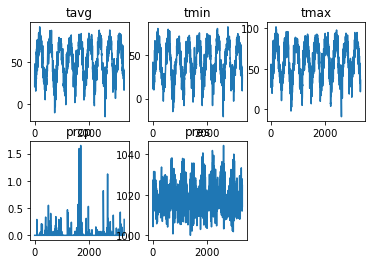

In [5]:
import numpy as np
import matplotlib.pyplot as plt

columns = np.array(df.columns)
for count, column in enumerate(columns[1:]):
    plt.subplot(2, 3, count+1)
    plt.plot(df[column])
    plt.title(column)
plt.show()

Variables tavg, tmin, tmax, and pres are time series models. Potential ML models to be applied can be logistic regresion, ARIMA, or classification (would need to restructure the data).

Although the variable prcp is technically a timeseries, it resembles a bar graph.

<AxesSubplot:>

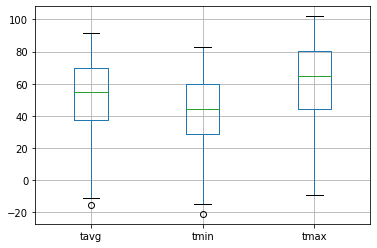

In [6]:
df.boxplot(column=['tavg', 'tmin', 'tmax'])  

<AxesSubplot:>

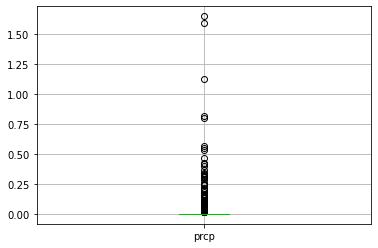

In [7]:
df.boxplot(column=['prcp'])

<AxesSubplot:>

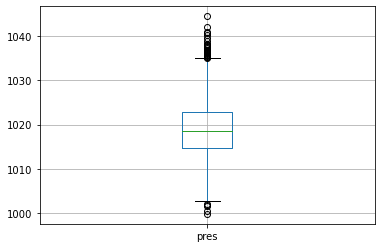

In [8]:
df.boxplot(column=['pres'])

According to our boxplot, the variables 'tavg', 'tmin', 'tmax' are very similar. This may suggest multicollinearity, which we will run a test for.

prcp has a large number of outliers. However, as we are are attempting to predict extreme weather conditions, these outliers may not be of much concern. We may need to scale or rebase this variable if needed.

pres has some outliers, but this may due to the number of points centered around the mean. These outliers can be removed by scaling using the quantile range.

In [9]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_check_values = df[['tavg', 'tmin', 'tmax']].dropna()

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(vif_check_values.values, i) for i in range(len(vif_check_values.columns))]
vif_df

,VIF
0,2615.683425
1,456.334432
2,1014.430743


<AxesSubplot:>

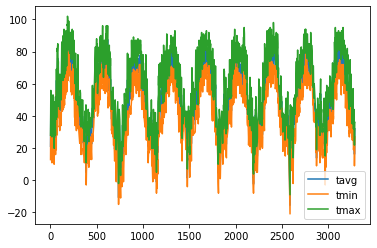

In [10]:
df[['tavg', 'tmin', 'tmax']].plot()

As we can see the three variables (tavg, tmin, tmax) all have extremely high variance inflation factors which suggests that there are high intercorrelations among the three independent variables. If using a mult-linear regression model, it would only be neccessary to use one of these variables, not all three. 

Additionally, tavg, tmin, and tmax contain NaN values.

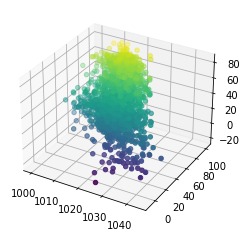

In [11]:
# fig = plt.figure()
askPlot = plt.axes(projection='3d')
x = df["pres"]
z = df["tmin"]
y = df["tmax"]
askPlot.scatter(x, y, z, c=z, cmap='viridis')

In [12]:
df[["pres", "tmax"]].corr()

,pres,tmax
pres,1.000000,-0.491039
tmax,-0.491039,1.000000


Lastly we find there there is a slight negative correlation between pres and tmax. This can be seen in the corr table and the 3-dimensional graph.

## Section 5: Visualization <br>

One of the visualizations that we have simply takes a deeper look into the geographical data present within meteostat where we are able to take a look at data within specific coordinates. Here we are presenting some data by using our API along with the point for Chicago (41.87, -87.65, 70). Furthermore we take a look at two distinctly different years to compare them for any sort of apparat changes.

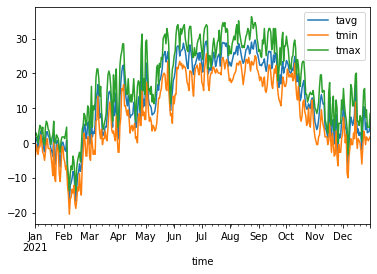

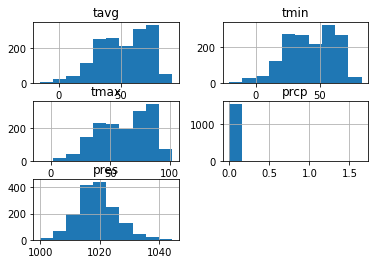

In [14]:
# pip install meteostat
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)

# Get daily data for 2018
data = Daily(chicago, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
df.hist()
plt.title("Temperature Over 2021")
plt.show()

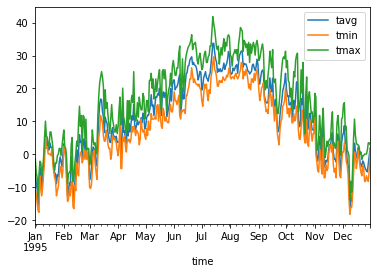

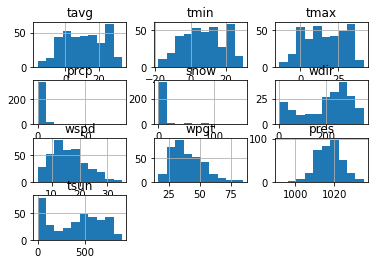

In [15]:
# Set time period
start = datetime(1995, 1, 1)
end = datetime(1995, 12, 31)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)

# Get daily data for 2018
data = Daily(chicago, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
data.hist()
plt.title("Temperature Over 1995")
plt.show()

Here we have data being collected from an x,y coordinate plane (I used google maps to pinpoint the coordinates of UIC and used that point to represent Chicago). In addition, I also made sure to add a bit more data than just the average temp, but I also factored in the lower range and the higher range for that particular date. I've also included a histogram of the respective columns to get an idea of where the temperatures are headed.

## Section 6: Machine Learning Analysis <br>

### Decision Tree and Random Forest Regressors

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import matplotlib.pyplot as plt

# remove dashes from date column and convert the column type to an int
df['date'] = df['date'].replace('-', '', regex=True).astype(int)

# drop rows with NaN in rows:
df = df.dropna(subset=['tavg','tmin','tmax'])

# split the data into two sets
X = df.drop(["prcp"], axis=1)
Y = df["prcp"]

# create training and testing data using a 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

DecisionTreeRegressor Metrics:
Mean Absolute Error:  0.02949526813880126
Mean Squared Error:  0.021640365930599367
Root Mean Squared Error:  0.14710664815228225


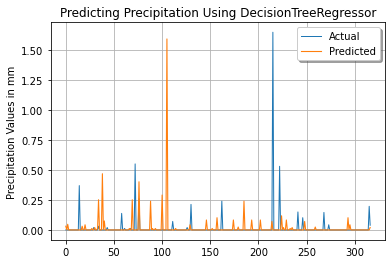

In [17]:
# create decision tree model and train it
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# make predictions on test set
y_pred = tree.predict(X_test)

# evaluating decision tree model
# Reference: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("DecisionTreeRegressor Metrics:")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

# plot the predicted and actual values
# Reference: https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="Actual")
plt.plot(x_ax, y_pred, linewidth=1.1, label="Predicted")
plt.title("Predicting Precipitation Using DecisionTreeRegressor")
plt.ylabel('Precipitation Values in mm')
plt.legend(loc='upper right',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

We created this model to serve as our baseline in order to be able to draw comparisons with a more advanced model. Based on the mean absolute error computed, the results for the decision tree model can be interpreted as on average, the model will be off by about 0.029 mm of total precipitation on any given date.

RandomForestRegressor Metrics:
Mean Absolute Error:  0.029832334384858043
Mean Squared Error:  0.014826056001577284
Root Mean Squared Error:  0.12176229302036523


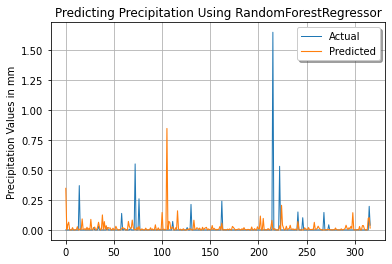

In [18]:
# create random forest model and train it
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# make predictions on test set
y_pred = forest.predict(X_test)

# evaluating random forest model
# Reference: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RandomForestRegressor Metrics:")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

# plot the predicted and actual values
# Reference: https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="Actual")
plt.plot(x_ax, y_pred, linewidth=1.1, label="Predicted")
plt.title("Predicting Precipitation Using RandomForestRegressor")
plt.ylabel('Precipitation Values in mm')
plt.legend(loc='upper right',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

To provide a comparison against our baseline model, we used a random forest regressor which collects multiple decision trees together. We were hopeful to see it perform better as typically random forest models produce better results with larger datasets when compared to using a single decision tree. Using the same metrics, we found that although the mean absolute error was almost the same, the mean squared error and the root mean squared error were significantly lower when using the random forest regressor. This was important because the closer those values are to 0, the more accurate the model is. Therefore, we chose to use the random forest regression model for a prediction on a randomly selected day below.

Predicted precipitation:  0.142
Actual precipitation:  0.161


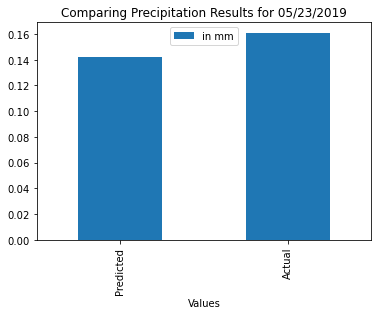

In [19]:
# example prediction from random day in dataset
# Reference: https://www.samloves.coffee/rainML 
pred_day = X.loc[X['date'] == 20190523]
pred_val = round(forest.predict(pred_day)[0], 3)


actual_day = df.loc[df['date'] == 20190523]
actual_val = round(actual_day.iloc[0]["prcp"], 3)

print("Predicted precipitation: ", pred_val)
print("Actual precipitation: ", actual_val)

# using bar chart to visualize model prediction
vals = {"Values":["Predicted", "Actual"], "in mm":[pred_val, actual_val]}
bc = pd.DataFrame(data=vals)
axes = bc.plot.bar(x="Values", y="in mm", title="Comparing Precipitation Results for 05/23/2019");
axes.legend(loc=9)

Using our chosen model on 05/23/2019 in Chicago, our model predicted that there would be 0.153 mm of precipitation. In reality, there was 0.161 mm. Therefore, while our model was off by 0.008 mm, it was lower than the average error, and it could reasonably be used to predict future precipitation values.

### Prophet Model <br>

In [22]:
# pip install prophet
from datetime import datetime
import math
from meteostat import Point
from meteostat import Daily
import pandas as pd

from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Set time period
startDate = datetime(2021, 1, 1)
endDate = datetime(2022, 9, 30)

# Create Point for Chicago
chicago = Point(41.868755, -87.646090, 70)
data = Daily(chicago, startDate, endDate)
data = data.fetch()

# Setting up training and testing data
train = data.loc[:'2022-08-31']
test = data.loc['2022-09-01':]

train = data[['tavg']]
train = train.reset_index()
train.columns = ['ds', 'y']



Importing plotly failed. Interactive plots will not work.


For our ML model we used something that was not referenced in class to our knowledge and wanted to properly document our references.
Sources used: https://facebook.github.io/prophet/docs/quick_start.html#python-api 

00:03:37 - cmdstanpy - INFO - Chain [1] start processing
00:03:38 - cmdstanpy - INFO - Chain [1] done processing


Diff. Betwwen Exp & Actual : 8.999577403258941


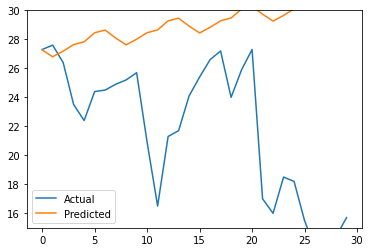

In [23]:
# Establishing our ML model 
model = Prophet()
model.fit(train)
future = pd.DataFrame(test.index.values)
future.columns = ['ds']
forecast = model.predict(future)

y_true = test['tavg'].values
y_pred = forecast['yhat'].values
diff = math.sqrt(mean_squared_error(y_true, y_pred))
print('Diff. Betwwen Exp & Actual :', diff)

# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylim(ymax=30, ymin=15)
plt.legend()
plt.show()

As our third machine learning analysis, we were able to take a look at the Prophet model which tends to be used when taking into consideration meterological data. This particular model was able to give us some insight into what the predicted temp was going to be in relation to the actual temp that was recorded in Chicago. This being said we can not make any claims in regards to a global scale or even a domestic scale as we are only taking a peek at data over the course of 2022. Interestingly enough though we can see that the actual temp ended up being quite lower than expected which is something we did not anticipate.

### Linear and Multi Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

# Reference: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# split datasets
y = df['tmax'].values.reshape(-1, 1)
X = df['pres'].values.reshape(-1, 1)

# get training and test sets based on 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create linear regression model and train it
linear = LinearRegression()
linear.fit(X_train, y_train)

# make predictions on test set
y_pred = linear.predict(X_test)

In [25]:
# evaluate linear regression model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("Linear Regression Metrics:")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Linear Regression Metrics:
Mean Absolute Error:  15.716619142024689
Mean Squared Error:  357.4189839295559
Root Mean Squared Error:  18.90552786699054


To provide a comparison between two models to predict the max temperature, we first used a linear regression model based on a single variable which was air pressure. After making a prediction based off the test set, we saw that on average, the model would be off by around 15.72 degrees. This seems like a pretty significant difference so we decided to try a more complex model with another variable to see if that could produce better results.

In [26]:
# split datasets
y = df['tmax']
X = df[['pres', 'prcp']]

# get training and test sets based on 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create multilinear regression model and train it
multilinear = LinearRegression()
multilinear.fit(X_train, y_train)

# displaying how each feature affects the max temperature
feature_names = X.columns
model_coeffs = multilinear.coef_
coeffs_df = pd.DataFrame(data = model_coeffs, index = feature_names, columns = ['Coefficient value'])

In [27]:
# make predictions on test set
y_pred = multilinear.predict(X_test)

# evaluate linear regression model
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = math.sqrt(mse2)

print(coeffs_df)
print("Linear Regression Metrics:")
print("Mean Absolute Error: ", mae2)
print("Mean Squared Error: ", mse2)
print("Root Mean Squared Error: ", rmse2)

      Coefficient value
pres          -1.626151
prcp          -7.683767
Linear Regression Metrics:
Mean Absolute Error:  15.729756476445505
Mean Squared Error:  359.30541072561203
Root Mean Squared Error:  18.95535308891955


We chose to compare the linear regression model against a multi linear regression model that took both the air pressure and precipitation variables into account to predict the max temperature. According to the coefficient values produced, when the air pressure increases by one unit, the air temperature decreases by 1.63 degrees. A more significant difference occurs when precipitation increases by one unit as the air temperature decreases by 7.68 degrees. Therefore, the amount of precipitation has much more of an influence on the max air temperature. In addition to this, the metrics computed for this model show a lower accuracy compared to when only the precipitation variable was included in the model. This means that there could be other variables such as snow and wind that could be more impactful on the air temperature compared to the air pressure.

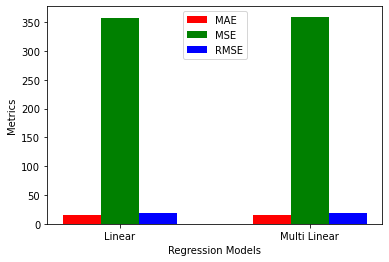

In [28]:
# metrics plotted for each model to visually show similarities
# Reference: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
import numpy as np
x = np.arange(2)
y1 = [15.72, 15.73]
y2 = [357.42, 359.31]
y3 = [18.91, 18.96]

plt.bar(x-0.2, y1, 0.2, color='red')
plt.bar(x, y2, 0.2, color='green')
plt.bar(x+0.2, y3, 0.2, color='blue')
plt.xticks(x, ['Linear', 'Multi Linear'])
plt.xlabel("Regression Models")
plt.ylabel("Metrics")
plt.legend(["MAE", "MSE", "RMSE"], loc=9)
plt.show()

### ARIMA time series forcasting

In [29]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = df.dropna()
  
hyperparam = auto_arima(df['tavg'], seasonal = True, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, d = 1, D = 1, error_action ='ignore', suppress_warnings = True, stepwise = True)
  
hyperparam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1582
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -5660.513
Date:                             Tue, 06 Dec 2022   AIC                          11331.026
Time:                                     00:07:49   BIC                          11357.817
Sample:                                          0   HQIC                         11340.984
                                            - 1582                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4369      0.035     12.404      0.000       0.368       0.506
ma.L1         -0.8097      0.023    -34.798      0.000      -0.855      -0.764
ar.S.L12      -0.6389      0.020    -32.126      0.000      -0.678      -0.600
ar.S.L24      -0.3354      0.021    -15.695      0.000      -0.377      -0.294
sigma2        79.3176      2.281     34.773      0.000      74.847      83.788
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               118.37
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.10
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To predict or forecast our time series data, we use an ARIMA model. 

Since we are using a weather dataset instantiate the ARIMA model to account for seasonality by setting the hyperparameter d to 1. 

The most important output from the auto_arima output above is the model parameters ouput. Our parameters for our seasonal ARIMA model is (2, 1, [], 12)

1. The degree of integration or the number of transformations needed to make our time series data stationary.
2. The auto regressive order or the number of values directly preceding the data point we are currently predicting. 
3. The moving average order of our ARIMA model. In our case we do not have one. 
4. The number of periods per "season." In our case this is 12 because there are 12 months in a yeare. 

<AxesSubplot:>

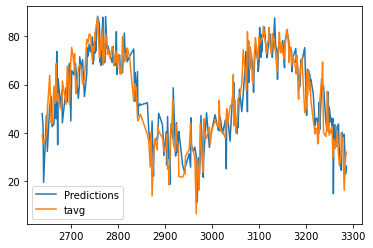

In [30]:
train = df.iloc[:len(df)-316]
test = df.iloc[len(df)-316:]
  
model = SARIMAX(df['tavg'], seasonal_order =(2, 1, [], 12))
  
fitted_model = model.fit()
fitted_model.summary()
  
predictions = fitted_model.predict(len(train), (len(train)+len(test)-1), yp = 'levels').rename("Predictions")
  
predictions.plot(legend = True)
test['tavg'].plot(legend = True)

In [31]:
mae = mean_absolute_error(test['tavg'], predictions)
mse = mean_squared_error(test['tavg'], predictions)
rmse = math.sqrt(mse)

print("ARIMA Model Metrics:")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

ARIMA Model Metrics:
Mean Absolute Error:  6.662568677406359
Mean Squared Error:  80.47589683912383
Root Mean Squared Error:  8.970835905261216


## Section 7: Results <br>

    o Machine Learning #1 (Decision Tree Model)
        Result:
        Visualization:  

    o Machine Learning #2 (Random Forest Model)
        Result:
        Visualization:  

    o Machine Learning #3 (Prophet Model)
        Result: We were able to devise a system that can show the actual vs predicted
        of temperature (daily averages) based on geographical location. The results
        show that the difference between the Prophet model and the actual 
        was about 8 degrees F.
        
        Visualization: In order to visualize this we used a line graph
        with both the Actual (blue) and the Predicted (orange) 
        to present the differences.

    o Machine Learning #4 (Linear Regression Model)
        Result:
        Visualization:  

    o Machine Learning #5 (ARIMA Time Series)
        Result:
        Visualization:  
        
#### Explicit Visualizations

    o Visualization #1 (Grid Linear Graphs)
        Result:

    o Visualization #2 (BoxPlot)
        Result:

    o Visualization #3 (Multi Variable Graph)
        Result:

    o Visualization #4 (3-D Scatter Plot)
        Result:

    o Visualization #5 (Multi Variable Graph)
        Result:  
    
    o Visualization #6 (Grid Histogram)
        Result: 

## Section 7: References <br>

References Used For the Project:

Data Collection:

https://dev.meteostat.net/guide.html#about-meteostat

Python Imports: 

https://pypi.org/project/requests/

https://pandas.pydata.org/

https://numpy.org/doc/stable/

https://docs.python.org/3/library/datetime.html

https://etav.github.io/python/vif_factor_python.html

https://www.projectpro.io/recipes/what-is-statsmodel-library-python-and-install-statsmodel-library-windows

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://pythonsimplified.com/how-to-get-weather-data-in-python-using-meteostat/

https://facebook.github.io/prophet/docs/quick_start.html#python-api
